In [39]:
#imports
from path import Path
import pandas as pd
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Data Prep

In [4]:
#set the position of the raw data as a variable
file = Path('crypto_data.csv')

In [6]:
#see shape of raw data
crypto_df = pd.read_csv(file, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [15]:
#remove all currencies that are not being traded and verify
traded_df = crypto_df[crypto_df['IsTrading'] == True]

print(f"Rows Removed:{len(crypto_df)-len(traded_df)}")

Rows Removed:108


In [16]:
#remove rows with a null value and verify
nonull_df = traded_df.dropna(axis=0)

print(f"Rows Removed:{len(traded_df)-len(nonull_df)}")

Rows Removed:459


In [17]:
#remove rows that have 0 coins mined and verify
mined_df = nonull_df[nonull_df['TotalCoinsMined'] > 0]

print(f"Rows Removed:{len(nonull_df) - len(mined_df)}")

Rows Removed:153


In [20]:
#remove the coin name column and verify
nameless_df = mined_df.drop(columns=['CoinName'])

nameless_df.head(1)

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,41.999954,42


In [28]:
#generate dummy variables based on the text columns 'Algorithm' and 'ProofType' then verify

x = pd.get_dummies(data = nameless_df, columns=['Algorithm','ProofType'])
print(x.shape)
x.head(1)

(532, 99)


,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,True,41.999954,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
#standardscaler to standardize the data and print the returned array
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled.shape)
x_scaled[0]

(532, 99)


array([ 0.        , -0.11710817, -0.1528703 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.06142951, -0.07530656, -0.0433963 , -0.06142951,
       -0.06142951, -0.0433963 , -0.0433963 , -0.19245009, -0.06142951,
       -0.09740465, -0.0433963 , -0.11547005, -0.07530656, -0.0433963 ,
       -0.0433963 , -0.15191091, -0.0433963 , -0.13118084, -0.0433963 ,
       -0.0433963 , -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.06142951, -0.0433963 , -0.08703883, -0.08703883,
       -0.08703883, -0.0433963 , -0.13118084, -0.13840913, -0.13840913,
       -0.0433963 , -0.06142951, -0.0433963 , -0.07530656, -0.18168574,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.07530656, -0.15826614,
       -0.31491833, -0.0433963 , -0.08703883, -0.07530656, -0.06142951,
        1.38675049, -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.39879994, -0.0433963 , -0.18

## Dimensionality Reduction

In [32]:
# preserve 90% of explained variance with 'PCA(n_components=0.90)'

pca = PCA(n_components=0.90)
components = pca.fit_transform(x_scaled)
components.shape
pca.explained_variance_.sum()

88.47283457566157

In [48]:
# reduce with t-SNE
tsne1 = TSNE(perplexity=75)
tsne1features = tsne1.fit_transform(components)
tsne1features.shape

C:\Users\patri\.conda\envs\pythondata\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\patri\.conda\envs\pythondata\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

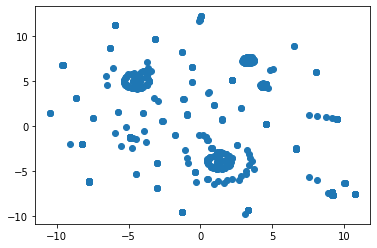

In [49]:
# plot tsne output
x = tsne1features[:,0]
y = tsne1features[:,1]
plt.scatter(x,y)
plt.show()

In [42]:
# use k-Means for cluster analysis
# for-loop to determine the inertia for each `k` between 1 through 10.
# Determine, if possible, where the elbow of the plot is, and at which 
# value of `k` it appears.
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

for value in k:
    kmeans = KMeans(n_clusters = value,random_state=0)
    kmeans.fit(components)
    inertia.append(kmeans.inertia_)

print(inertia)

C:\Users\patri\.conda\envs\pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[46979.075159676315, 45909.85719267494, 45133.34722821854, 43778.70040018537, 43053.330625269045, 42145.52060152307, 41477.16746887094, 40171.94107707052, 39663.17536645091, 38753.710958706666]


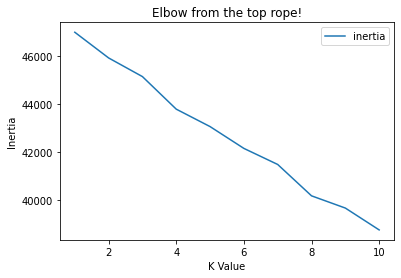

In [45]:
#Create an elbow plot to find a bend indicating clustering
elbow = pd.DataFrame({'K':k,'inertia':inertia})
elbow.plot.line(x='K',y='inertia')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.title('Elbow from the top rope!')
plt.show()

## Recommendation

Using cluster analysis on the cleaned dataset, no clear clustering could be observed in the pca plot, nor is there an elbow in the elbow plot. A classification system applied to these currencies would be unadvisable.